In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [7]:
from DynamicSystem import Linear_Dynamic_System
import os
import numpy.random as nrd
from MOR import AE_Reduced_System, POD_Reduced_System
import numpy as np
from util import mse

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# define the dimension of the system
dim_x = 50 # dimension of inate state
dim_y = 1 # dimension of output
dim_u = 5 # dimention of input
time_steps = 200 # time steps to be generated
dim_x_reduct = 10 # dimension after MOR


original_sys = Linear_Dynamic_System(dim_x, dim_u, dim_y) # define a system


# randomly generate the input u and x0
u = np.random.randn(dim_u, time_steps)
x0 = np.random.randn(dim_x, 1)

# generate data
x, y = original_sys.gen(x0, u, time_steps)
print("the shape of x: ", x.shape)
print("the shape of y: ", y.shape)

the shape of x:  (50, 200)
the shape of y:  (1, 200)


In [29]:
ae_sys = AE_Reduced_System(original_sys, dim_x_reduct, nonlinear=True)
reconst_x_AE, reconst_y_AE = ae_sys.fit(x)

import importlib
import MOR
importlib.reload(MOR)

pod_sys = MOR.POD_Reduced_System(original_sys, dim_x_reduct)
reconst_x_POD, reconst_y_POD = pod_sys.fit(x)

In [30]:
# training set

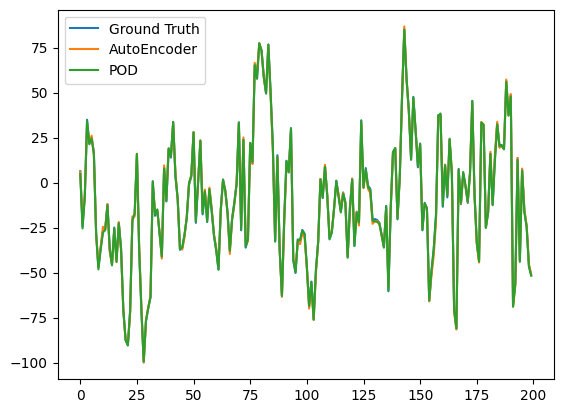

In [31]:
plt.plot(y.reshape(-1), label="Ground Truth")
plt.plot(reconst_y_AE.reshape(-1), label="AutoEncoder")
plt.plot(reconst_y_POD.reshape(-1), label='POD')
plt.legend()

Text(0.5, 1.0, 'POD')

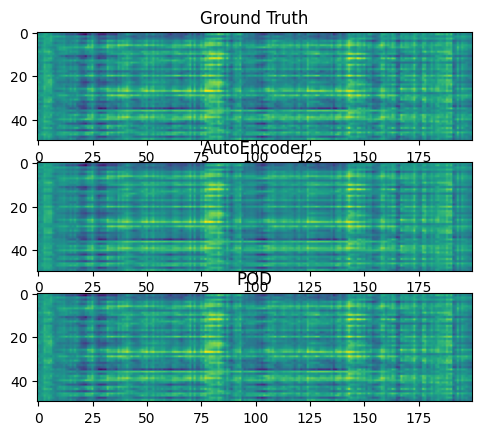

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.imshow(x)
ax1.set_title("Ground Truth")
ax2.imshow(reconst_x_AE)
ax2.set_title("AutoEncoder")
ax3.imshow(reconst_x_POD)
ax3.set_title("POD")

In [18]:
# test set

In [19]:
u_test = np.random.randn(dim_u, time_steps)
true_x = np.random.randn(dim_x)

In [20]:
# true_x = x[:, -1]
cur_x = ae_sys.compress(true_x)
true_ys, ae_ys = [], []
true_xs, ae_xs = [], []
for i in range(time_steps):
    true_x, true_y = original_sys.step(true_x, u_test[:, i])
    new_x, new_y = ae_sys.step(cur_x, u_test[:, i])
    # print(true_y.shape, new_y.shape)
    true_ys.append(true_y[0])
    true_xs.append(true_x)
    ae_ys.append(new_y[0])
    ae_xs.append(ae_sys.decompress(new_x))

In [27]:
# true_x = x[:, -1]
cur_x = pod_sys.compress(true_x)
true_ys, pod_ys = [], []
true_xs, pod_xs = [], []
for i in range(time_steps):
    true_x, true_y = original_sys.step(true_x, u_test[:, i])
    new_x, new_y = pod_sys.step(cur_x, u_test[:, i])
    # print(true_y.shape, new_y.shape)
    true_ys.append(true_y[0])
    true_xs.append(true_x)
    pod_ys.append(new_y[0])
    pod_xs.append(pod_sys.decompress(new_x))

AttributeError: 'POD_Reduced_System' object has no attribute 'decompress'

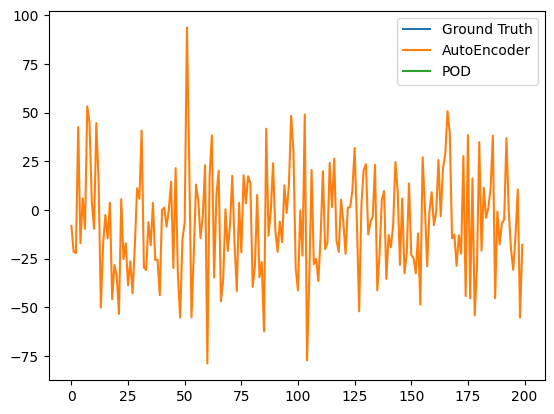

In [28]:
plt.plot(true_ys, label="Ground Truth")
plt.plot(ae_ys, label="AutoEncoder")
plt.plot(pod_ys, label="POD")
plt.legend()

Text(0.5, 1.0, 'POD')

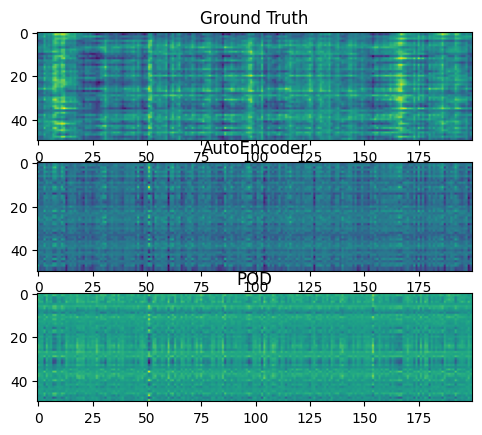

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.imshow(np.stack(true_xs).T)
ax1.set_title("Ground Truth")
ax2.imshow(np.stack(ae_xs).T)
ax2.set_title("AutoEncoder")
ax3.imshow(np.stack(pod_xs).T)
ax3.set_title('POD')